In [0]:
import csv
import pandas as pd
import io

In [12]:
from google.colab import files
uploaded = files.upload()

Saving rizulala.csv to rizulala.csv


In [13]:

df = pd.read_csv(io.StringIO(uploaded['tizu.csv'].decode('utf-8')))
df


"","text","favorited","favoriteCount","replyToSN","created","truncated","replyToSID","id","replyToUID","statusSource","screenName","retweetCount","isRetweet","retweeted","longitude","latitude"
"1","I...


In [30]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['rizulala.csv'].decode('cp1252')))
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,I posted a new video to Facebook https://t.co/...,False,1,NaN,2018-10-13 09:16:57,False,NaN,1051039075371638784,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN
1,2,Dulu selalu mngata orang. Sekarang? Begituuu j...,False,18,NaN,2018-10-04 17:19:23,False,NaN,1047898992477184000,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,4,False,False,NaN,NaN
2,3,I posted a new video to Facebook https://t.co/...,False,4,NaN,2018-09-15 09:57:00,False,NaN,1040902295616016384,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN
3,4,I posted a new video to Facebook https://t.co/...,False,4,NaN,2018-08-21 16:51:07,False,NaN,1031946811240538113,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN
4,5,I posted a new video to Facebook https://t.co/...,False,3,NaN,2018-08-17 12:39:55,False,NaN,1030434046667411457,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN


In [24]:
!pip install textblob

In [31]:
rizData = df['text']
rizData.describe()

count                                                   198
unique                                                  198
top       Peribadiku itu urusan ku. Hina atau tidak itu ...
freq                                                      1
Name: text, dtype: object

In [0]:
from textblob import TextBlob

In [0]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df['sentiment'] = df['text'].apply(sentiment_calc)

In [38]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,sentiment
0,1,I posted a new video to Facebook https://t.co/...,False,1,NaN,2018-10-13 09:16:57,False,NaN,1051039075371638784,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN,"(0.13636363636363635, 0.45454545454545453)"
1,2,Dulu selalu mngata orang. Sekarang? Begituuu j...,False,18,NaN,2018-10-04 17:19:23,False,NaN,1047898992477184000,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,4,False,False,NaN,NaN,"(0.0, 0.0)"
2,3,I posted a new video to Facebook https://t.co/...,False,4,NaN,2018-09-15 09:57:00,False,NaN,1040902295616016384,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN,"(0.13636363636363635, 0.45454545454545453)"
3,4,I posted a new video to Facebook https://t.co/...,False,4,NaN,2018-08-21 16:51:07,False,NaN,1031946811240538113,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN,"(0.13636363636363635, 0.45454545454545453)"
4,5,I posted a new video to Facebook https://t.co/...,False,3,NaN,2018-08-17 12:39:55,False,NaN,1030434046667411457,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",RizUlala,0,False,False,NaN,NaN,"(0.13636363636363635, 0.45454545454545453)"


In [0]:
list_to_drop = ['Unnamed: 0','favorited','favoriteCount','replyToSN','created','created','truncated','replyToSID','id','replyToUID','statusSource','screenName','retweetCount','isRetweet','retweeted','longitude','latitude']

In [46]:
newRiz = df.drop((list_to_drop), axis ='columns')
newRiz.head()

,text,sentiment
0,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)"
1,Dulu selalu mngata orang. Sekarang? Begituuu j...,"(0.0, 0.0)"
2,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)"
3,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)"
4,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)"


In [0]:
import numpy as np      # For number computing
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [64]:
newRiz.iloc[7].sentiment.polarity

0.0

In [79]:
newRiz["SA"].dtype

dtype('int64')

In [67]:
# We create a column with the result of the analysis:
newRiz['SA'] = np.array([ analize_sentiment(text) for text in newRiz['text'] ])

# We display the updated dataframe with the new column:
display(newRiz.head(10))

,text,sentiment,SA
0,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1
1,Dulu selalu mngata orang. Sekarang? Begituuu j...,"(0.0, 0.0)",0
2,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1
3,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1
4,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1
5,Adoi. Payment org lansung x bayar. Dah lah org...,"(0.0, 0.0)",0
6,#kekechallange <U+2764><U+FE0F> https://t.co/c...,"(0.0, 0.0)",0
7,@ffiekahishak @AdikQemall @brgsjks Mana aku ju...,"(0.0, 0.0)",0
8,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1
9,I posted a new video to Facebook https://t.co/...,"(0.13636363636363635, 0.45454545454545453)",1


In [69]:
mean = np.mean(newRiz['SA'])
print("The sentiments average in tweets: {}".format(mean))

The sentiments average in tweets: 0.3434343434343434


In [0]:
pos_tweets = [ tweet for index, tweet in enumerate(newRiz['text']) if newRiz['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(newRiz['text']) if newRiz['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(newRiz['text']) if newRiz['SA'][index] < 0]

In [0]:
per_pos = len(pos_tweets)*100/len(newRiz['text'])
per_neu = len(neu_tweets)*100/len(newRiz['text'])
pet_neg = len(neg_tweets)*100/len(newRiz['text'])

In [81]:
print(per_pos)
print(per_neu)
print(pet_neg)

36.36363636363637
61.61616161616162
2.0202020202020203


In [0]:
import matplotlib.pyplot as plt

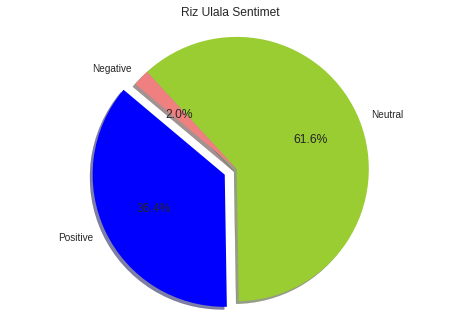

In [85]:
# Data to plot
labels = 'Positive','Neutral','Negative'
sizes = [per_pos, per_neu, pet_neg]
colors = ['blue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Riz Ulala Sentimet')
plt.axis('equal')
plt.show()

